<a href="https://www.kaggle.com/code/khushisingh19/amazon-products-sales-dataset-2023?scriptVersionId=140714652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ** OBJECTIVE** 
The objective is to find the best products at good price with discounts

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/amazon-products-dataset/Gaming Consoles.csv
/kaggle/input/amazon-products-dataset/Car Electronics.csv
/kaggle/input/amazon-products-dataset/Janitorial and Sanitation Supplies.csv
/kaggle/input/amazon-products-dataset/All Electronics.csv
/kaggle/input/amazon-products-dataset/All Books.csv
/kaggle/input/amazon-products-dataset/Make-up.csv
/kaggle/input/amazon-products-dataset/Travel Accessories.csv
/kaggle/input/amazon-products-dataset/Indian Language Books.csv
/kaggle/input/amazon-products-dataset/Car and Bike Care.csv
/kaggle/input/amazon-products-dataset/Sunglasses.csv
/kaggle/input/amazon-products-dataset/Bags and Luggage.csv
/kaggle/input/amazon-products-dataset/Yoga.csv
/kaggle/input/amazon-products-dataset/Sportswear.csv
/kaggle/input/amazon-products-dataset/Fiction Books.csv
/kaggle/input/amazon-products-dataset/Exam Central.csv
/kaggle/input/amazon-products-dataset/Home Storage.csv
/kaggle/input/amazon-products-dataset/Toys Gifting Store.csv
/kaggle/input/amazon-pr

In [2]:
df=pd.read_csv('/kaggle/input/amazon-products-dataset/Amazon-Products.csv')
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [4]:
df.shape

(551585, 10)

In [5]:
df.isna().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
551580    False
551581    False
551582    False
551583    False
551584    False
Length: 551585, dtype: bool

In [7]:
# Remove unwanted column
df.drop(columns=['image', 'link'], inplace=True)

In [8]:
# Remove space and rupee sign from disocunt_price and actual_price
df['discount_price']=df['discount_price'].str.strip()
df['discount_price']= df['discount_price'].str.split('₹', expand=True).get(1)
df['actual_price']=df['actual_price'].str.strip()
df['actual_price']= df['actual_price'].str.split('₹', expand=True).get(1)

In [9]:
# remove comma (,) sign from discount price and actula price
df['discount_price'] = df['discount_price'].str.replace(',','')
df['actual_price'] = df['actual_price'].str.replace(',','')

In [10]:
df['discount_price']= df['discount_price'].astype(float)
df['actual_price']= df['actual_price'].astype(float)

In [11]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [12]:
df['ratings'] = df['ratings'].replace(['FREE', 'Get', '₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99'],'0.0')

In [13]:
df.drop_duplicates()

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",32999.0,58990.0
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",46490.0,75990.0
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",34490.0,61990.0
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,37990.0,68990.0
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,34490.0,67790.0
...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,3449.0,4599.0
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,1199.0,1999.0
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,1199.0,1999.0
551583,1102,Puma Men Shorts,sports & fitness,Yoga,4.4,37,NaN,NaN


In [14]:
# Change the datatype of ratings from object float.
df['ratings']=df['ratings'].astype(float)

In [15]:
# Change the datatype of no_of_ratings to str and then create a new boolean column 'correct_no_of_ratings'
df['no_of_ratings'] = df['no_of_ratings'].astype(str)
df['correct_no_of_ratings'] = pd.Series([df['no_of_ratings'][x][0].isdigit() for x in range(len(df['no_of_ratings']))])

In [16]:
# Drop Columns with df['correct_no_of_ratings'] = False
df=df[df['correct_no_of_ratings']==True]
df['correct_no_of_ratings'].value_counts()

True    369558
Name: correct_no_of_ratings, dtype: int64

In [17]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',','').astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369558 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             369558 non-null  int64  
 1   name                   369558 non-null  object 
 2   main_category          369558 non-null  object 
 3   sub_category           369558 non-null  object 
 4   ratings                369558 non-null  float64
 5   no_of_ratings          369558 non-null  float64
 6   discount_price         334963 non-null  float64
 7   actual_price           362797 non-null  float64
 8   correct_no_of_ratings  369558 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 25.7+ MB


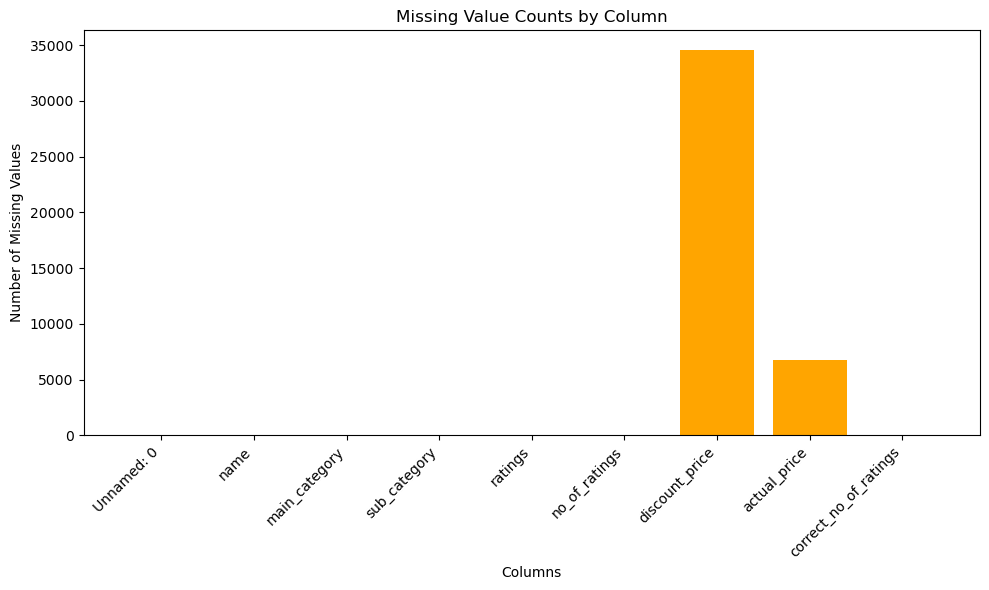

In [19]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Create a bar plot for missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values, color='orange')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Value Counts by Column")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
# Rows with missing value of actual price
missing_actualPrice = df[df['actual_price'].isnull()]
missing_actualPrice

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings
76,76,LG 1.5 Ton 3 Star Hot & Cold DUAL Inverter Spl...,appliances,Air Conditioners,4.0,265.0,NaN,NaN,True
100,100,Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp...,appliances,Air Conditioners,3.8,748.0,NaN,NaN,True
114,114,Panasonic 1.5 Ton 4 Star Wi-Fi Twin-Cool Inver...,appliances,Air Conditioners,4.5,195.0,NaN,NaN,True
144,144,Daikin 1.5 Ton 4 Star Hot & Cold Heat Pump Inv...,appliances,Air Conditioners,3.7,27.0,NaN,NaN,True
146,146,LG 1.5 Ton 5 Star AI DUAL Inverter Wi-Fi Split...,appliances,Air Conditioners,4.7,34.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...
551269,788,Red Tape Men Hoodie,sports & fitness,Yoga,2.0,2.0,NaN,NaN,True
551367,886,Adidas Men's Flat Jacket,sports & fitness,Yoga,4.0,11.0,NaN,NaN,True
551410,929,Mode By Red Tape Women Black Hoodie,sports & fitness,Yoga,3.6,3.0,NaN,NaN,True
551471,990,Campus Sutra Women Printed Hoodie,sports & fitness,Yoga,3.7,8.0,NaN,NaN,True


In [21]:
# Drop the rows having missing actual price 
df=df.dropna(subset=['actual_price', 'discount_price'])
df.isnull().sum()

Unnamed: 0               0
name                     0
main_category            0
sub_category             0
ratings                  0
no_of_ratings            0
discount_price           0
actual_price             0
correct_no_of_ratings    0
dtype: int64

In [22]:
# Extract the manufacturer from the 'name' column and insert the 'manufacturer' column after the 'name' column. To do this, we convert the 'name' column (type 'Series') into a string, split by spaces and select the first substring.
df["Manufacturer"]=df['name'].str.split(" ").str[0]
df

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings,Manufacturer
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,True,Lloyd
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,True,LG
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0,True,LG
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0,True,LG
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0,True,Carrier
...,...,...,...,...,...,...,...,...,...,...
551579,1098,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6.0,711.0,999.0,True,BE
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9.0,3449.0,4599.0,True,Adidas
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2.0,1199.0,1999.0,True,Redwolf
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1.0,1199.0,1999.0,True,Redwolf


In [23]:
# To list out all columns and then rearrange them and remove unwanted column
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'name',
 'main_category',
 'sub_category',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'correct_no_of_ratings',
 'Manufacturer']

In [24]:
cols = ['name',
  'Manufacturer',
 'main_category',
 'sub_category',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price'
       ]

df = df[cols]

In [25]:
# Make column with discount net value and discounting percent 
df['Total_Discount'] = df['actual_price'] - df['discount_price']
df['discount_percent'] = round((df['Total_Discount']*100)/df["actual_price"], 2)

df


/tmp/ipykernel_21/1998022989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Discount'] = df['actual_price'] - df['discount_price']


,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,25991.0,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,29500.0,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0,27500.0,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0,31000.0,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0,33300.0,49.12
...,...,...,...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,BE,sports & fitness,Yoga,4.6,6.0,711.0,999.0,288.0,28.83
551580,Adidas Regular Fit Men's Track Tops,Adidas,sports & fitness,Yoga,3.2,9.0,3449.0,4599.0,1150.0,25.01
551581,Redwolf Noice Toit Smort - Hoodie (Black),Redwolf,sports & fitness,Yoga,2.0,2.0,1199.0,1999.0,800.0,40.02
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),Redwolf,sports & fitness,Yoga,4.0,1.0,1199.0,1999.0,800.0,40.02


In [26]:
# Let us check the manufactures according to their prices
df[['Manufacturer', 'actual_price']].groupby("Manufacturer").mean().round(2).sort_values(by="actual_price", ascending = False)

,actual_price
Manufacturer,
Marutivilla,4.950001e+09
DENON,2.129000e+05
IMALENT,1.900000e+05
XGIMI,1.899077e+05
Mijia,1.849990e+05
...,...
Too,2.000000e+01
"Sprite,",2.000000e+01
Bingo!,1.000000e+01


In [27]:
df[['Manufacturer', 'ratings']].groupby("Manufacturer").mean().round(2).sort_values(by='ratings', ascending=False)

,ratings
Manufacturer,
LICHTS,5.0
MARPAXS,5.0
Chanak,5.0
Hanaa1,5.0
Muckamuck,5.0
...,...
Conch,1.0
AUSHA®Action,1.0
Comzone,1.0


In [28]:
# Detail of the maximum price row
df[df["actual_price"]==df["actual_price"].max()]


,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",Marutivilla,home & kitchen,Garden & Outdoors,2.0,1.0,589.0,9.900000e+09,9.899999e+09,100.0


In [29]:
# Detail of the minimum price row
df[df["actual_price"]==df["actual_price"].min()]


,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
23172,"Bingo! Tedhe Medhe Masala Tadka, 50g, Spindle ...",Bingo!,grocery & gourmet foods,All Grocery & Gourmet Foods,4.5,289.0,9.0,10.0,1.0,10.0
124233,"BRU Instant Coffee Sachet,Ground, 8g",BRU,grocery & gourmet foods,"Coffee, Tea & Beverages",4.0,7.0,8.0,10.0,2.0,20.0
268602,Rin Detergent Bar - 165g,Rin,beauty & health,Household Supplies,4.0,44.0,9.0,10.0,1.0,10.0
437600,"Kurkure Yummy Cheese Puffcorn Namkeen, 28g",Kurkure,grocery & gourmet foods,Snack Foods,4.4,1485.0,9.0,10.0,1.0,10.0
437604,"Lay's Potato Chips 24g/27g, West Indies Hot 'n...",Lay's,grocery & gourmet foods,Snack Foods,4.3,864.0,9.0,10.0,1.0,10.0
437916,"Cadbury Oreo Original Vanilla Creme Biscuit, 4...",Cadbury,grocery & gourmet foods,Snack Foods,4.4,1353.0,9.0,10.0,1.0,10.0


In [30]:
# Top 10 most common manufacture. Manufacturer whose product is sold most
value=df['Manufacturer'].value_counts().keys().tolist()[:11]
count=df["Manufacturer"].value_counts().tolist()[:11]
value

['Puma',
 'Amazon',
 'The',
 'Red',
 'U.S.',
 'Campus',
 'Pepe',
 'Van',
 'Clovia',
 "Levi's",
 'Adidas']

In [31]:
import plotly.express as px

fig=px.bar(x=value, y=count)
fig.update_traces(marker_color='orange')
fig.update_layout(
    xaxis_title = 'Manufacturers',
    yaxis_title = 'Count of Products',
    title = '<b> Popular Manufacturers </b>'
)
fig

From above graph we see that the Puma is most popular.

In [32]:
# Creating the dataframe of top 10 manufacturer
list=[]
for i in value:
    x=df[df['Manufacturer']==i]
    list.append(x)
    
dataframe=pd.concat(list)
dataframe

,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
21275,Puma polyester 23 Cms Gym Bag(7572229_Pink_X_Red),Puma,sports & fitness,All Exercise & Fitness,4.1,249.0,789.0,1499.0,710.0,47.36
21776,Puma Women's Boyfriend Leggings,Puma,sports & fitness,All Exercise & Fitness,4.4,12.0,566.0,1999.0,1433.0,71.69
21966,Puma Women Track Pants,Puma,sports & fitness,All Exercise & Fitness,4.4,5.0,1649.0,2999.0,1350.0,45.02
22153,Puma Men Pants,Puma,sports & fitness,All Exercise & Fitness,3.7,12.0,1110.0,2999.0,1889.0,62.99
22241,Puma Men's Plain Socks,Puma,sports & fitness,All Exercise & Fitness,4.4,11.0,339.0,999.0,660.0,66.07
...,...,...,...,...,...,...,...,...,...,...
551443,Adidas Men Shorts,Adidas,sports & fitness,Yoga,4.0,9.0,1749.0,2499.0,750.0,30.01
551547,Adidas Men's Cotton Mhs Fz Sta Track Tops (H16...,Adidas,sports & fitness,Yoga,3.6,5.0,1449.0,4599.0,3150.0,68.49
551549,Adidas Men's Standard,Adidas,sports & fitness,Yoga,3.0,2.0,4949.0,6599.0,1650.0,25.00
551568,Adidas Men's Standard,Adidas,sports & fitness,Yoga,3.4,16.0,1349.0,4299.0,2950.0,68.62


In [33]:
# Average rating of the manufactures
dataframe[["Manufacturer", "ratings"]].groupby("Manufacturer").mean().round(4).sort_values(by="ratings", ascending=False)


,ratings
Manufacturer,
The,3.9482
Van,3.9444
Amazon,3.9404
Puma,3.9141
Adidas,3.8677
Levi's,3.8551
U.S.,3.8233
Campus,3.8123
Red,3.7320


Even though the most popular brand is Puma but Amazon has high rating than Puma.
Let us now check the popular main category items present.

In [34]:
# Different main categories present
dataframe["main_category"].unique()
dataframe

,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
21275,Puma polyester 23 Cms Gym Bag(7572229_Pink_X_Red),Puma,sports & fitness,All Exercise & Fitness,4.1,249.0,789.0,1499.0,710.0,47.36
21776,Puma Women's Boyfriend Leggings,Puma,sports & fitness,All Exercise & Fitness,4.4,12.0,566.0,1999.0,1433.0,71.69
21966,Puma Women Track Pants,Puma,sports & fitness,All Exercise & Fitness,4.4,5.0,1649.0,2999.0,1350.0,45.02
22153,Puma Men Pants,Puma,sports & fitness,All Exercise & Fitness,3.7,12.0,1110.0,2999.0,1889.0,62.99
22241,Puma Men's Plain Socks,Puma,sports & fitness,All Exercise & Fitness,4.4,11.0,339.0,999.0,660.0,66.07
...,...,...,...,...,...,...,...,...,...,...
551443,Adidas Men Shorts,Adidas,sports & fitness,Yoga,4.0,9.0,1749.0,2499.0,750.0,30.01
551547,Adidas Men's Cotton Mhs Fz Sta Track Tops (H16...,Adidas,sports & fitness,Yoga,3.6,5.0,1449.0,4599.0,3150.0,68.49
551549,Adidas Men's Standard,Adidas,sports & fitness,Yoga,3.0,2.0,4949.0,6599.0,1650.0,25.00
551568,Adidas Men's Standard,Adidas,sports & fitness,Yoga,3.4,16.0,1349.0,4299.0,2950.0,68.62


In [35]:
fig = px.bar(dataframe, "main_category", 
             color_discrete_sequence = ["orange"] * len(dataframe))
fig.update_layout(
                 plot_bgcolor = "black",
                  yaxis_title = "Count",
                  xaxis_title = "Main Categories",
                  title = "<b>Count of Main Categories of Products</b>"
                 )
fig.show()

From the graph we see that 'Man's cloothing' is the popular main category.

Let us create a new dataframe having top 10 popular manufcturers and 5 most popular main category.

In [36]:
# Let us select the 5 popular main categories

value_main = dataframe["main_category"].value_counts().keys().tolist()[:5]
count_main = dataframe["main_category"].value_counts().tolist()[:5]

value_main

["men's clothing", "men's shoes", "women's clothing", 'stores', 'accessories']

In [37]:
df_list = []
for i in value_main:
    x = dataframe[dataframe["main_category"] == i]
    df_list.append(x)
dataframe = pd.concat(df_list)
dataframe.head(2)


,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
272427,Puma Men's Regular Fit Vest,Puma,men's clothing,Innerwear,4.4,5.0,559.0,799.0,240.0,30.04
272574,Puma Men's Boxer Shorts (58672906_Blue_XL),Puma,men's clothing,Innerwear,4.6,20.0,809.0,1799.0,990.0,55.03


In [38]:
# Let us check the popular subcategory

cm = sns.light_palette("green", as_cmap=True)
dataframe_sub = dataframe[["main_category", "sub_category"]].groupby("main_category").count()
dataframe_sub.style.background_gradient(cmap=cm)

,sub_category
main_category,
accessories,1282
men's clothing,7154
men's shoes,4601
stores,2917
women's clothing,3648


In [39]:
value_sub = dataframe["sub_category"].value_counts().keys().tolist()[:10]
count_sub = dataframe["sub_category"].value_counts().tolist()[:10]

value_sub

['T-shirts & Polos',
 'Sports Shoes',
 'Shirts',
 'Casual Shoes',
 "Men's Fashion",
 'Jeans',
 'Lingerie & Nightwear',
 'Sportswear',
 'Western Wear',
 'Clothing']

In [40]:
# New dataframe with selected sub_category
df_list = []
for i in value_sub:
    x = dataframe[dataframe["sub_category"] == i]
    df_list.append(x)
dataframe = pd.concat(df_list)
dataframe.head(2)

,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
479282,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,3.3,14.0,709.0,1499.0,790.0,52.70
479316,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,3.8,12.0,689.0,1499.0,810.0,54.04


we have achieved a dataframe with: 
Popular top 5 main categories, 10 sub_category

Let us now check the average rating and price for this selected dataframe.

In [41]:
# Rating of the products
print("The average rating: ",dataframe["ratings"].unique())

# After processing our data we have significantly reduced the size of the dataframe.
# Also the rating are now 4 or greater.
# Let us now check new average price ### check above before processing to compare.
print("The average price: ", dataframe["actual_price"].mean())

The average rating:  [3.3 3.8 3.4 3.7 3.6 3.5 2.8 5.  4.1 3.  4.  3.1 4.4 3.9 4.6 4.2 3.2 1.
 2.  4.7 4.3 2.9 4.5 2.1 4.8 2.6 1.5 2.4 2.7 2.2 2.5 2.3 1.8 4.9 1.6 1.9
 1.4 1.7 1.3]
The average price:  2874.3065506347975


In [42]:
import plotly.figure_factory as ff
x = dataframe["actual_price"]
hist_data = [x]
group_labels = ['actual_price']

fig = ff.create_distplot(hist_data, group_labels, show_rug = False,
                        colors=["black"])
fig.update_layout(
                 plot_bgcolor = "lightblue",
                  title = "<b>Price Distribution of Data</b>"
                 )

fig.show()

In [43]:
# Check the statistics of the price_new column
dataframe.actual_price.describe()

count    16777.000000
mean      2874.306551
std       2115.084722
min        215.000000
25%       1499.000000
50%       2299.000000
75%       3799.000000
max      25062.000000
Name: actual_price, dtype: float64

In [44]:
fig = px.histogram(dataframe, "no_of_ratings",
                  color_discrete_sequence = ["#8B4000"] * len(dataframe))
fig.update_xaxes(range=[10, 5000])
fig.update_yaxes(range=[0, 2000])
fig.update_layout(
                 plot_bgcolor = "#ECECEC",
                  xaxis_title = "Number of Reviews",
                  title = "<b>Number of Reviews Distribution</b>"
                 )
fig.show()

In [45]:
# Let us check if there are any null review
print("Number of null values: ",dataframe['no_of_ratings'].isnull().sum())
# It seems that with high end products people love to leave a review

Number of null values:  0


In [46]:
dataframe.head(2)

,name,Manufacturer,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Total_Discount,discount_percent
479282,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,3.3,14.0,709.0,1499.0,790.0,52.70
479316,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,3.8,12.0,689.0,1499.0,810.0,54.04


In [47]:
dataframe["no_of_ratings"]

479282     14.0
479316     12.0
479320     31.0
479427      6.0
479443    123.0
          ...  
120301     17.0
120360      1.0
122209     23.0
122420      4.0
122953     38.0
Name: no_of_ratings, Length: 16777, dtype: float64

In [48]:

import plotly.express as px

fig = px.scatter(dataframe, x="discount_percent", y="no_of_ratings", trendline="ols")
fig.update_yaxes(range=[0, 1000])
fig.update_layout(
    title="<b>Relationship between the number of reviews and discount percent</b>",
    plot_bgcolor="#ECECEC",
    yaxis_title="Number of reviews",
    xaxis_title="Discount percent"
)

fig.show()

We observe an OLS trendline indicating a slight decrease in the number of reviews as the discount percentage increases.


In [49]:
fig = px.histogram(dataframe, "discount_percent",
                  color_discrete_sequence = ["#C04000"] * len(dataframe))
fig.update_layout(
                 plot_bgcolor = "#ECECEC",
                  xaxis_title = "Discount Percent",
                  title = "<b>Number of products with different discount percent</b>"
                 )
fig.show()


# **CONCLUSION**:

1. Marutivilla is the costliest manufacture.
2. Puma is the most popular brand but Amazon has higher rating than Puma.
3. Man's clothing is the most popular in main_category with 7154 sub_category.
4. From graph between No. of reviewa and discount percentag, we see that OLS trendline of We observe an OLS trendline indicating a slight decrease in the number of reviews as the discount percentage increases.

